# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

###### Paul Comitz 7/30/2017

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# phc 7/19/2017
training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print("data loaded\nlen of X_train is:",len(X_train))
print("len of y_train is:",len(y_train))

#test that the number of training, validation, and test sets and labels match 
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

data loaded
len of X_train is: 34799
len of y_train is: 34799


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# phc 7/19/2017
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes =  len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

image class is: 11


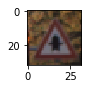

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# phc 7/19/2017
# display an image from the training set
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
print("image class is:",y_train[index])


###### Show multiple images from training set.
The class label is shown above each image. 

Randomly selected images from the training set


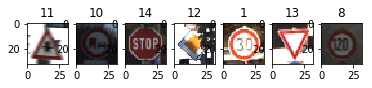

In [10]:
print("Randomly selected images from the training set")
fig = plt.figure()
for j in range (0,7):
    index = random.randint(0, len(X_test))
    a=fig.add_subplot(1,7,j+1)
    image = X_test[index].squeeze()
    title = str(y_test[index])
    a.set_title(title)
    plt.imshow(image)

##### Show the distribution of classes in the training data set
Using pandas and matplotlib, show the frequency of classes in the training set. This visualization was shown to me by a prior mentor.  

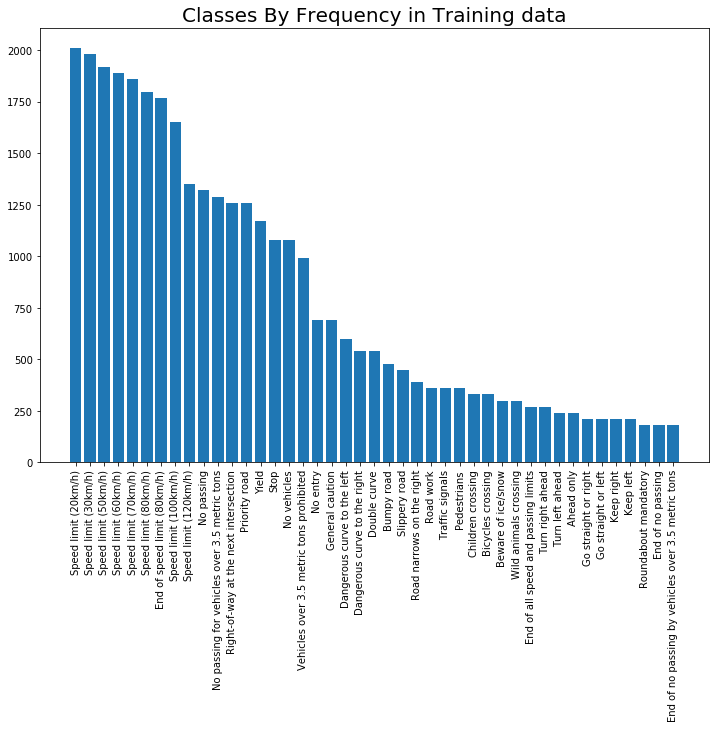

In [13]:
import pandas as pd
freq_by_sign = [[i,sum(y_train == i)] for i in range(len(np.unique(y_train)))]
freq_bs_sorted = sorted(freq_by_sign, key=lambda x: x[1])
sign_names = pd.read_csv('signnames.csv')
sign_names['Frequency'] = pd.Series(np.asarray(freq_bs_sorted).T[1], index=np.asarray(freq_bs_sorted).T[0])
sign_names_sorted = sign_names.sort_values(['Frequency'],ascending=[0]).reset_index()
sign_names_sorted = sign_names_sorted.drop('index', 1)

plt.figure(figsize=(12,8))
plt.title('Classes By Frequency in Training data', fontsize=20)
plt.xticks(range(sign_names.shape[0]), sign_names['SignName'], rotation='vertical')
plt.bar(range(sign_names.shape[0]),height=sign_names_sorted["Frequency"])
print()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [6]:
# normalization of a single pixel
X_train.astype(np.float)
def normalize(x):
    x = (x -128)/128
    return x

In [7]:
#normalize and array
# assume array of float passed in
# uses normalize(x) where x is a single pixel
def normalizeArray(x):
    count = 0
    for i in range(len(x)):
        for j in range(len(x[0])):
            for k in range(len(x[0][0])):
                for l in range(len(x[0][0][0])):
                    x[i][j][k][l]=normalize(x[i][j][k][l]) 
                    count+=1 
    print("normalized count:", count)
    return x

##### Test the normalization approach
Normalize a random pixel and examine the values
Use the randomly generated index from the exploratory visualization above

In [8]:
#test the normalize process, use the random index generated above
print(X_train[index][0][0][0])
print(X_train[index][0][0][1])
print(X_train[index][0][0][2])
#test normalize with a  random pixel
normR = (X_train[index][0][0][0] - 128)/128
normG = (X_train[index][0][0][1] - 128)/128
normB = (X_train[index][0][0][2] - 128)/128
print("normR:",normR)
print("normG:",normG)
print("normB:",normB)
print("normalize function:", normalize(X_train[index][0][0][0]), "for index:", index)

110
66
53
normR: -0.140625
normG: -0.484375
normB: -0.5859375
normalize function: -0.140625 for index: 30114


In [9]:
#Shuffle the data 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


##### Perform the normalizatons
Normalize the test, train, and valid data sets
Convert the uint arrays of pix to float

In [10]:
#normalize valid set
X_valid = X_valid.astype(np.float)
print("normalizing X_valid")
X_valid = normalizeArray(X_valid)

normalizing X_valid
normalized count: 13547520


In [11]:
#normalize training set
X_train = X_train.astype(np.float)
print("normalizing X_train ...")
X_train = normalizeArray(X_train)

normalizing X_train ...
normalized count: 106902528


In [12]:
#normalize test set 
X_test = X_test.astype(np.float)
print("normalizing X_test ...")
X_test = normalizeArray(X_test)

normalizing X_test ...
normalized count: 38799360


### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
### Use LeNet 5 as the basis 
### Increasing the EPOCHS to 30 gave the desired results

In [13]:
import tensorflow as tf
EPOCHS = 30
BATCH_SIZE = 128
from tensorflow.contrib.layers import flatten


##### LeNet 5 
This is the LeNet 5 architecture. A few minor changes were required
- In the first convolution layer the shape of the filter must be changed to (5,5,3,6) to accomodate the 3 channels in the input image
- In the last layer (fully connected) the number of outputs must be changed from 10 to 43

In [14]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # input was 32x32x3
    # phc change from 5,5,1,6 to 5,5,3,6 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # phc 7/23/17 
    # changed output from 10 to 43
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

##### Features and Labels
Change x placeholder to have a depth of 3 for R,G,B
Change number of classes to 43 

In [15]:
# x is the placeholder for the inputs
# y is the placeholder for the labels 
# x = tf.placeholder(tf.float32, (None, 32, 32, 1))
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
#phc change labels to 43
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

##### Training Pipeline

In [17]:
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

##### Prepare for Model Evaluation 

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [19]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

##### Train the Model

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

print("Did training")

Training...

EPOCH 1 ...
Validation Accuracy = 0.789

EPOCH 2 ...
Validation Accuracy = 0.870

EPOCH 3 ...
Validation Accuracy = 0.880

EPOCH 4 ...
Validation Accuracy = 0.900

EPOCH 5 ...
Validation Accuracy = 0.909

EPOCH 6 ...
Validation Accuracy = 0.909

EPOCH 7 ...
Validation Accuracy = 0.914

EPOCH 8 ...
Validation Accuracy = 0.912

EPOCH 9 ...
Validation Accuracy = 0.913

EPOCH 10 ...
Validation Accuracy = 0.924

EPOCH 11 ...
Validation Accuracy = 0.922

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.920

EPOCH 14 ...
Validation Accuracy = 0.917

EPOCH 15 ...
Validation Accuracy = 0.919

EPOCH 16 ...
Validation Accuracy = 0.923

EPOCH 17 ...
Validation Accuracy = 0.923

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 19 ...
Validation Accuracy = 0.922

EPOCH 20 ...
Validation Accuracy = 0.924

EPOCH 21 ...
Validation Accuracy = 0.930

EPOCH 22 ...
Validation Accuracy = 0.923

EPOCH 23 ...
Validation Accuracy = 0.925

EPOCH 24 ...
Validation Accura

##### Evaluate the Model Using the Test Set
  

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.925


##### Exercise the Validation Set

In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_valid, y_valid)
    print("Validation Set Accuracy = {:.3f}".format(test_accuracy))

Validation Set Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images
Begin by loading the new images 
The new images were collected from various places around the internet

In [22]:
### Load the new images and plot them here.
### Feel free to use as many code cells as needed.
### Adding 5 test images 
import matplotlib.image as img
new_images = np.ndarray(shape=(5,32,32,3))
file1 = 'new_images\\10.jpg'
file2 = 'new_images\\14.jpg'
file3 = 'new_images\\28.jpg'
file4 = 'new_images\\40.jpg'
file5 = 'new_images\\8.jpg'

#new labels and images 
new_labels = ([10,14,28,40,8])
new_images[0]= img.imread(file1) 
new_images[1]= img.imread(file2) 
new_images[2]= img.imread(file3) 
new_images[3]= img.imread(file4) 
new_images[4]= img.imread(file5) 

   
print("Shape of new_images is:",np.shape(new_images)) 
print("length of new_images is:", len(new_images))

Shape of new_images is: (5, 32, 32, 3)
length of new_images is: 5


In [23]:
### Function to display images ###
# display the images in a row
# they don't display properly as float
# must convert to uint8
def displayImages(x,y,length):
    plt.figure(figsize=(1,1))
    fig = plt.figure()
    for i in range(len(x)):
        a=fig.add_subplot(1,length,i+1)
        title = str(y[i])
        a.set_title(title)
        image= x[i].squeeze()
        image = image.astype(np.uint8)
        plt.imshow(image)


#### Display the new images 

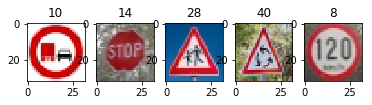

In [24]:
displayImages(new_images,new_labels,len(new_images))

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#### Normalize the new images

In [25]:
print("begin normalization of new images")
normalizeArray(new_images)
print("normalization of new images complete")

begin normalization of new images
normalized count: 15360
normalization of new images complete


#### View the normalized new images

new images, normalized


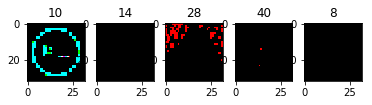

In [26]:
print("new images, normalized")
displayImages(new_images,new_labels,len(new_images))  

### Analyze Performance
- Evaluate the accuracy on the new images 
- For each of the new images, print out the model's softmax probabilities to show the certainty of the model's predictions (limit the output to the top 5 probabilities for each image). For each of the new images, print out the model's softmax probabilities to show the certainty of the model's predictions (limit the output to the top 5 probabilities for each image)

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('.\\lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.\\'))
    new_image_accuracy = evaluate(new_images, new_labels)
    print("Test Accuracy new images= {:.3f}".format(new_image_accuracy))
    result = sess.run(softmax, feed_dict={x: new_images})
    values, indices = tf.nn.top_k(result, 5)
    predictions  = sess.run(values)
    predictionIndices  = sess.run(indices)
    print("predictions")
    print(predictions)
    print("predictionIndices")
    print(predictionIndices)
    

Test Accuracy new images= 0.600
predictions
[[  1.00000000e+00   1.18270109e-15   2.19302227e-18   9.97740150e-24
    1.20976530e-29]
 [  1.00000000e+00   3.25901112e-10   8.09210961e-14   2.36400187e-14
    4.92685015e-15]
 [  1.00000000e+00   6.50358199e-14   2.66344485e-18   2.52816897e-20
    1.61932282e-26]
 [  9.99979973e-01   1.99879651e-05   3.37122379e-11   2.87356805e-11
    2.76908687e-11]
 [  9.99999881e-01   8.03574807e-08   3.23657030e-12   4.46195625e-13
    1.79928582e-13]]
predictionIndices
[[10 42  9 35 23]
 [14 13 17 10  5]
 [28 29 24 20 23]
 [24 20 40 38 22]
 [25 35 20  3 38]]
